In [1]:
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1     ✔ purrr   0.3.2
✔ tibble  2.1.1     ✔ dplyr   0.8.1
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


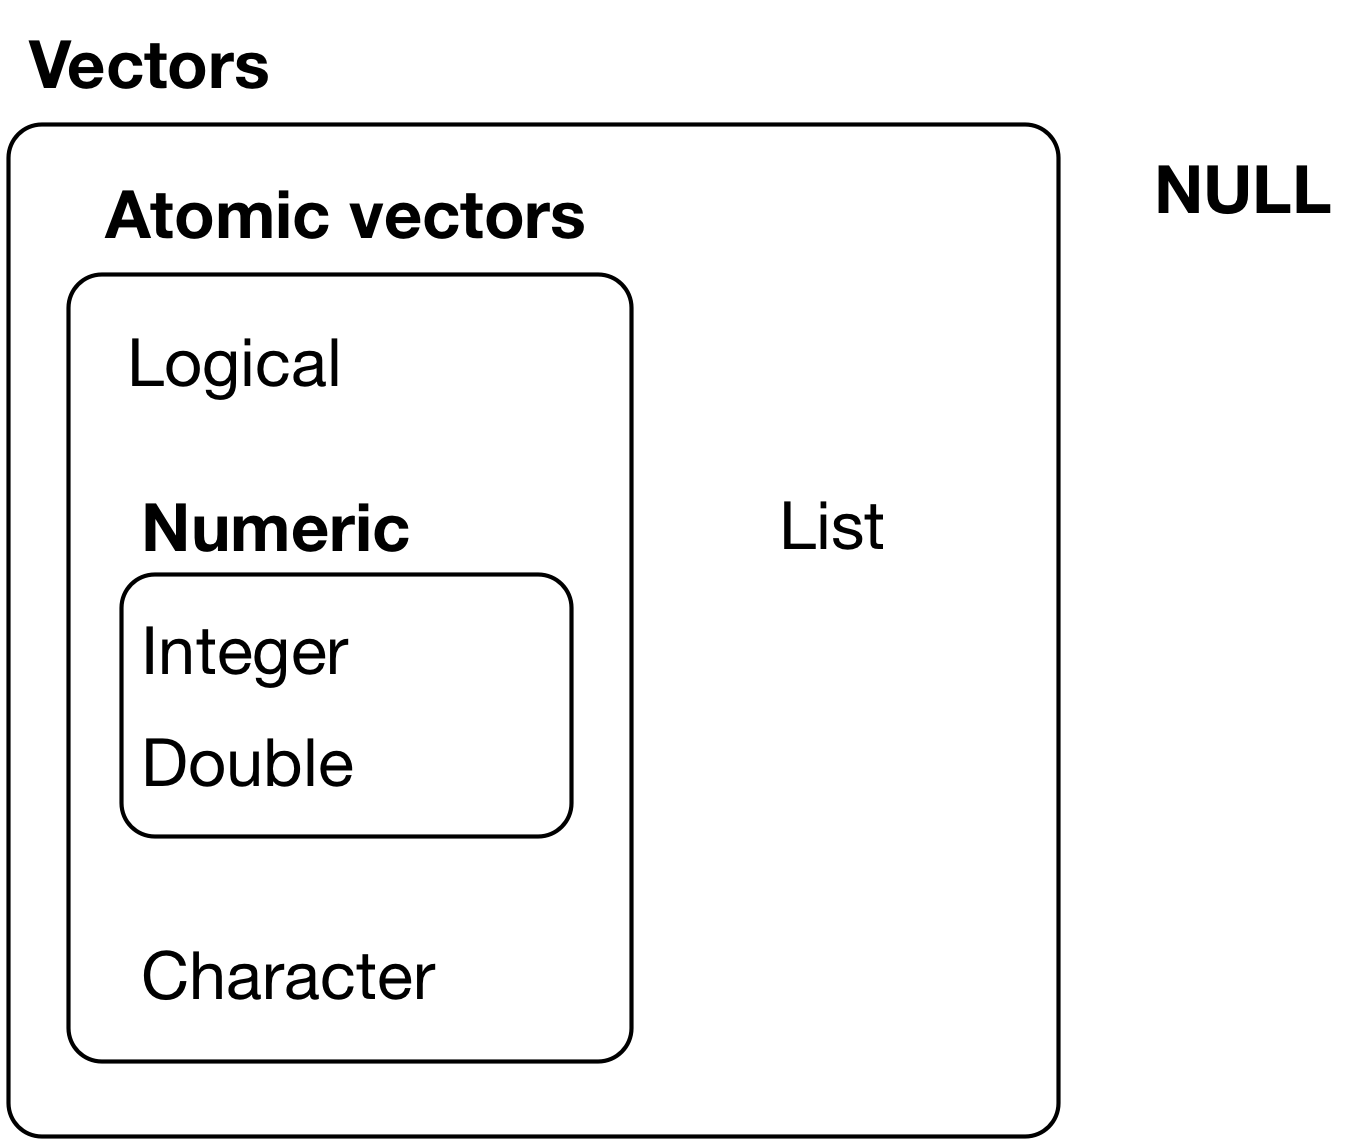

In [2]:
typeof(letters)
typeof(1:10)

[1] "character"

[1] "integer"

In [3]:
x <- list("a", "b", 1:10)
length(x)

[1] 3

In [4]:
1:10 %% 3 == 0
c(TRUE, TRUE, FALSE, NA)

[1] FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE

[1]  TRUE  TRUE FALSE    NA

In [5]:
typeof(1)
typeof(1L)
1.5L

[1] "double"

[1] "integer"

[1] 1.5

In [7]:
x <- sqrt(2) ^ 2
x
x - 2
2-2

[1] 2

[1] 4.440892e-16

[1] 0

In [10]:
c(-1, 0, 1) / 0

[1] -Inf  NaN  Inf

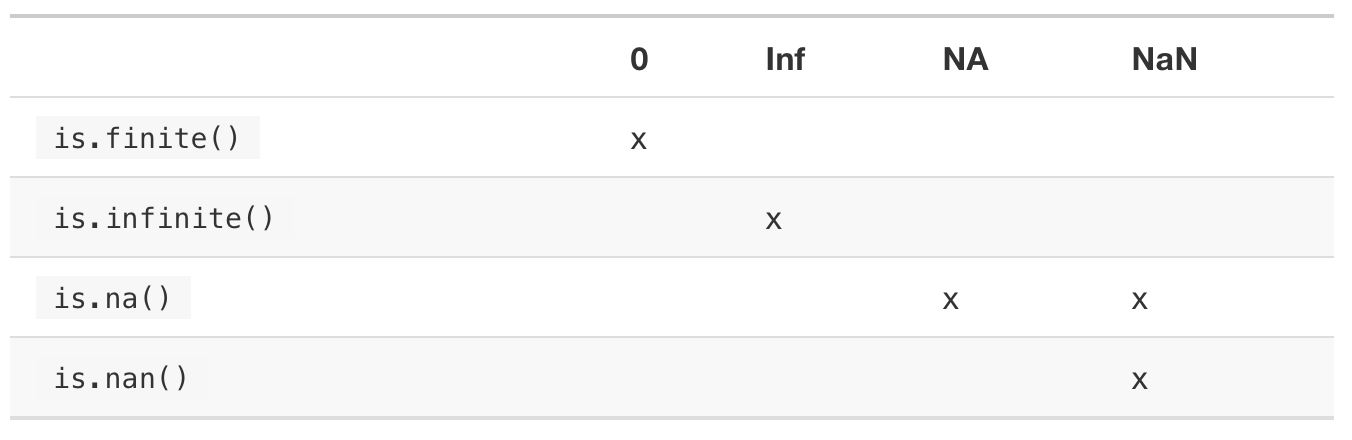

In [11]:
x <- "This is a reasonably long string."
pryr::object_size(x)

y <- rep(x, 1000)
pryr::object_size(y)

Registered S3 method overwritten by 'pryr':
  method      from
  print.bytes Rcpp


152 B

8.14 kB

In [12]:
NA            # logical
NA_integer_   # integer
NA_real_      # double
NA_character_ # character

[1] NA

[1] NA

[1] NA

[1] NA

In [13]:
x <- c(0, NA, NaN, Inf, -Inf)
is.finite(x)
!is.infinite(x)

[1]  TRUE FALSE FALSE FALSE FALSE

[1]  TRUE  TRUE  TRUE FALSE FALSE

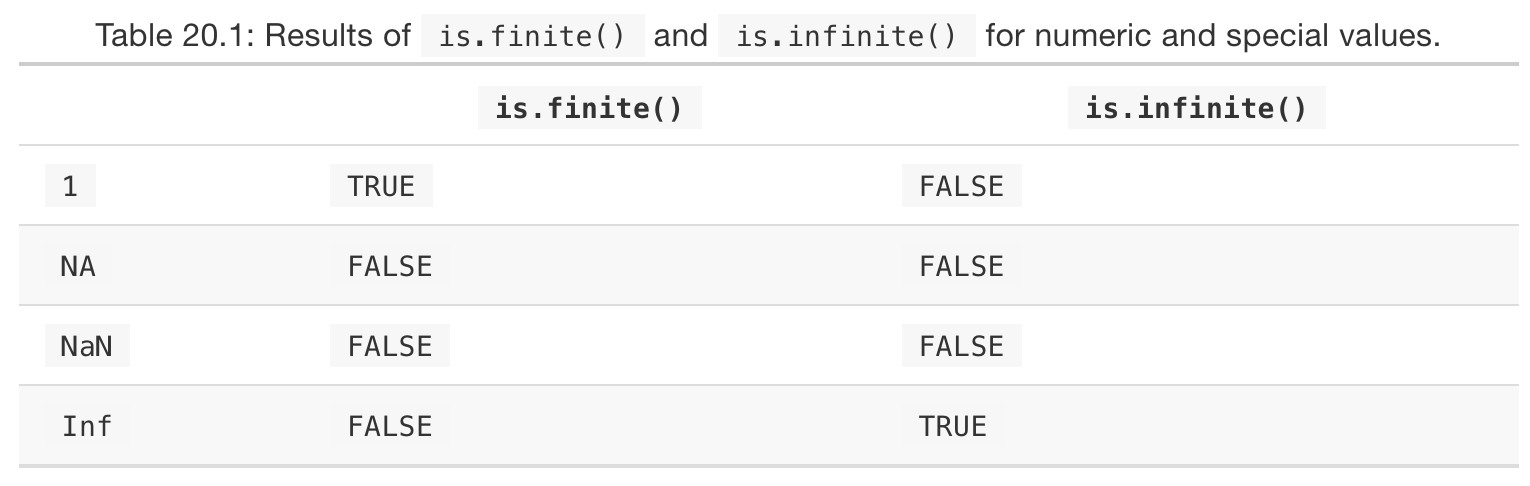

In [20]:
dplyr::near
.Machine$double.eps
.Machine$double.eps/.Machine$double.eps==1. #*********** verifies smallest number !

function (x, y, tol = .Machine$double.eps^0.5) 
{
    abs(x - y) < tol
}
<bytecode: 0x7fd4b099d8d0>
<environment: namespace:dplyr>

[1] 2.220446e-16

[1] TRUE

In [33]:
.Machine$integer.max
2^32/2-1

[1] 2147483647

[1] 2147483647

In [30]:
.Machine$integer.max + 1L

Warning message in .Machine$integer.max + 1L:
“NAs produced by integer overflow”

[1] NA

In [36]:
as.numeric(.Machine$integer.max) + 1
typeof(as.numeric(.Machine$integer.max) + 1)

[1] 2147483648

[1] "double"

In [37]:
-.Machine$integer.max - 1L

Warning message in -.Machine$integer.max - 1L:
“NAs produced by integer overflow”

[1] NA

In [40]:
.Machine$double.xmax

[1] 1.797693e+308

In [41]:
.Machine$double.base

[1] 2

In [42]:
.Machine$double.digits

[1] 53

In [43]:
.Machine$double.exponent

[1] 11

In [44]:
.Machine$double.eps
.Machine$double.neg.eps

[1] 2.220446e-16

[1] 1.110223e-16

Computerphile, “Floating Point Numbers”
https://en.wikipedia.org/wiki/IEEE_754
https://en.wikipedia.org/wiki/Double-precision_floating-point_format
“Floating Point Numbers: Why floating-point numbers are needed”
Fabien Sanglard, “Floating Point Numbers: Visually Explained”
James Howard, “How Many Floating Point Numbers are There?”
GeeksforGeeks, “Floating Point Representation Basics”
Chris Hecker, “Lets Go to the (Floating) Point”, Game Developer
Chua Hock-Chuan, A Tutorial on Data Representation Integers, Floating-point Numbers, and Characters
John D. Cook, “Anatomy of a floating point number”
John D. Cook, “Five Tips for Floating Point Programming”

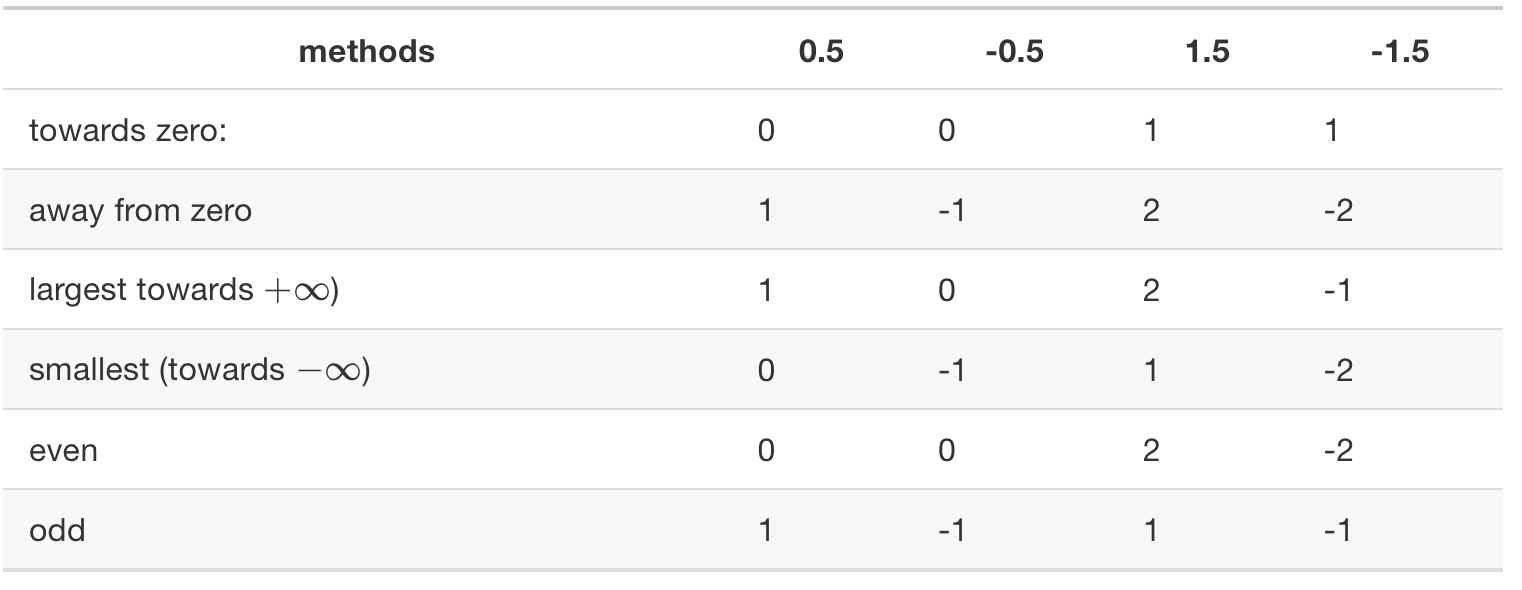

See the Wikipedia article IEEE floating point for rounding rules.

For rounding, R and many programming languages use the IEEE standard. This is “round to nearest, ties to even”. This is not the same as what you See the value of looking at the value of .Machine$double.rounding and its documentation.

cool code
**********

In [46]:
x <- seq(-10, 10, by = 0.5)

round2 <- function(x, to_even = TRUE) {
  q <- x %/% 1
  r <- x %% 1
  q + (r >= 0.5)
}
x <- c(-12.5, -11.5, 11.5, 12.5)
round(x)
round2(x, to_even = FALSE)

[1] -12 -12  12  12

[1] -12 -11  12  13

In [ ]:
x <- seq(-100.5, 100.5, by = 1)
sum(x)
#> [1] 0
sum(round(x))
#> [1] 0
sum(round2(x))

Here’s a real-world non-engineering example of rounding going terribly wrong. In 1983, the Vancouver stock exchange adjusted its index from 524.811 to 1098.892 to correct for accumulated error due to rounding to three decimal points (see Vancouver Stock Exchange).

Here’s a list of a few more.
https://web.ma.utexas.edu/users/arbogast/misc/disasters.html

In [49]:
parse_logical(c("TRUE", "FALSE", "1", "0", "true", "t", "NA"))

[1]  TRUE FALSE  TRUE FALSE  TRUE  TRUE    NA

In [50]:
parse_integer(c("1235", "0134", "NA"))

[1] 1235  134   NA

In [51]:
parse_integer(c("1000", "$1,000", "10.00"))

Warning message:
“2 parsing failures.
row col               expected actual
  2  -- an integer             $1,000
  3  -- no trailing characters .00   
”

[1] 1000   NA   NA
attr(,"problems")
# A tibble: 2 x 4
    row   col expected               actual
  <int> <int> <chr>                  <chr> 
1     2    NA an integer             $1,000
2     3    NA no trailing characters .00

In [58]:
parse_number(c("1.0", "3.5", "$1,000.00", "NA"))
parse_number(c("1.0", "3.5", "$1,000.00", "NA"))[0]
parse_number(c("1.0", "3.5", "$1,000.00", "NA"))[1]
typeof(parse_number(c("1.0", "3.5", "$1,000.00", "NA"))[1])
parse_number(c("1.0", "3.5", "$1,000.00", "NA"))[2]

[1]    1.0    3.5 1000.0     NA

numeric(0)

[1] 1

[1] "double"

[1] 3.5

In [158]:
x <- sample(c(90,200), 100, replace = TRUE)
x
x <- sample(c(90:200), 100, replace = TRUE)
x
x <- sample(20, 100, replace = TRUE)
x

y <- x > 10
sum(y)  # how many are greater than 10?
mean(y) # what proportion are greater than 10?

[1] 200  90 200 200 200  90  90  90  90  90 200  90 200 200 200  90 200 200
 [19] 200  90 200  90 200 200 200  90  90  90  90  90  90 200 200 200 200 200
 [37]  90 200  90 200 200 200 200 200 200 200  90  90  90  90 200 200  90  90
 [55]  90  90  90 200 200 200 200  90  90  90  90 200  90  90  90  90 200  90
 [73] 200  90 200 200 200  90 200 200  90  90 200  90  90 200 200 200  90 200
 [91] 200  90 200  90  90  90  90  90  90  90

[1] 112 185 135 148 197  99 101 199 140 127 147 155 162 101 104 148 161 113
 [19] 169 174 121 171  93 190 100 105 163 104 148 172 149 125 196 159 123 102
 [37] 113 125 159 122 127 131 168  92 154 139 177 154 102 199 102 135 105 176
 [55] 183 163 198 108 191 176 180 101 198 136 107 125 129 130 161  98 135 190
 [73] 102 152 132  92 195  97 130 133 198 122 187 115 140 121  91 115 181 144
 [91] 115 120 115 113 111 142 145 147 137 176

[1] 18  6 14 18 11  1 15  4  6  6 16 20 17  7  3 14 14 14 19  2 19 18 17  4 18
 [26] 20  1 18  9 11  5  7 11  2 16 15  9 16 11 15  9  9 14 14  7  8 19 19  3  9
 [51]  1 13 19  9 19  2 20  8 18  3 12  9  4  2  1 14 16 15  1 13 17  6 13 19  3
 [76]  7 16 11  1 12 16 19 15 14 10 18 19 16  9 18 12  8  2  3  1  8  7 10 12 19

[1] 56

[1] 0.56

In [162]:
length(x)
if (length(x)) {
  "hello"# do something
}

[1] 100

[1] "hello"

In [165]:
typeof(c(TRUE, 1L, .01, 'a'))
typeof(c(1L, 1.5))
typeof(c(1.5, "a"))

[1] "character"

[1] "double"

[1] "character"

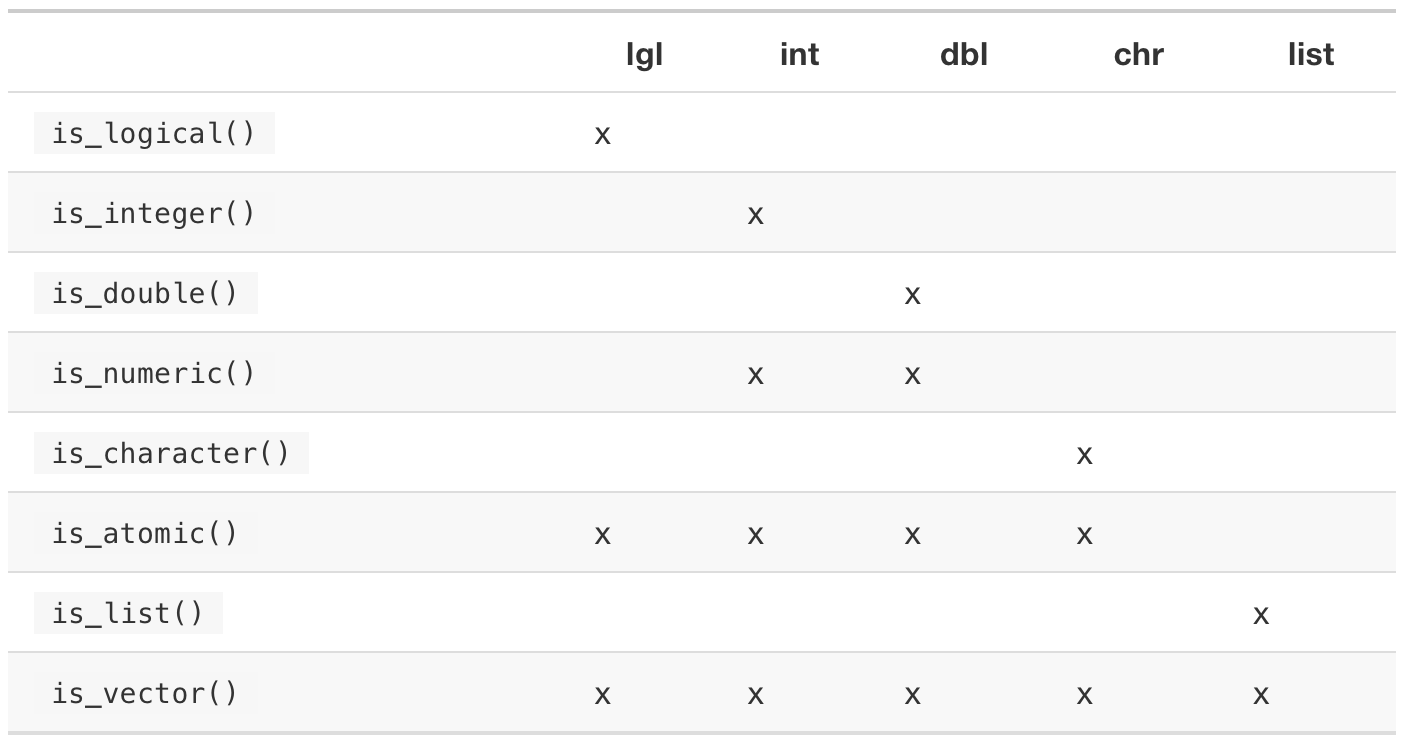

In [166]:
sample(10) + 100
runif(10) > 0.5

[1] 104 108 105 106 102 107 110 109 101 103

[1] FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE FALSE

In [167]:
1:10 + 1:2

[1]  2  4  4  6  6  8  8 10 10 12

In [168]:
1:10 + 1:3

Warning message in 1:10 + 1:3:
“longer object length is not a multiple of shorter object length”

[1]  2  4  6  5  7  9  8 10 12 11

In [169]:
tibble(x = 1:4, y = 1:2)
tibble(x = 1:4, y = rep(1:2, 2))
tibble(x = 1:4, y = rep(1:2, each = 2))

ERROR: Tibble columns must have consistent lengths, only values of length one are recycled:
* Length 2: Column `y`
* Length 4: Column `x`

In [170]:
c(x = 1, y = 2, z = 4)

x y z 
1 2 4

In [ ]:
set_names(1:3, c("a", "b", "c"))

In [171]:
x <- c("one", "two", "three", "four", "five")
x[c(3, 2, 5)]

[1] "three" "two"   "five"

In [172]:
x[c(1, 1, 5, 5, 5, 2)]

[1] "one"  "one"  "five" "five" "five" "two"

In [173]:
x[c(-1, -3, -5)]

[1] "two"  "four"

In [174]:
x[c(1, -1)]

ERROR: Error in x[c(1, -1)]: only 0's may be mixed with negative subscripts


In [175]:
x[0]

character(0)

In [177]:
x <- c(10, 3, NA, 5, 8, 1, NA)

# All non-missing values of x
x[!is.na(x)]

# All even (or missing!) values of x
x[x %% 2 == 0]

[1] 10  3  5  8  1

[1] 10 NA  8 NA

In [ ]:
x <- c(abc = 1, def = 2, xyz = 5)
x[c("xyz", "def")]

In [178]:
x <- c(-Inf, -1, 0, 1, Inf, NA, NaN)

In [179]:
mean(is.na(x))

[1] 0.2857143

In [ ]:
sum(!is.finite(x))

In [182]:
is.vector(list(a = 1, b = 2))
typeof(list(c(1,2,3)))

[1] TRUE

[1] "list"

In [189]:
x <- 1:10
attr(x, "something") <- TRUE
is.vector(x)
x

[1] FALSE

[1]  1  2  3  4  5  6  7  8  9 10
attr(,"something")
[1] TRUE

In [190]:
is.atomic(1:10)
is.atomic(list(a = 1))

[1] TRUE

[1] FALSE

In [195]:
# create a 2 by 5 matrix
x <- 1:10
attr(x,"dim") <- c(2, 5)
x

1,3,5,7,9
2,4,6,8,10


In [197]:
is.atomic(x)
is.vector(x)

[1] TRUE

[1] FALSE

In [217]:
setNames(1:4, c("a", "b", "c", "d"))
setNames(1:5, c("a", "b", "c", "d"))

a b c d 
1 2 3 4

a    b    c    d <NA> 
   1    2    3    4    5

In [212]:
setNames(nm = c("a", "b", "c", "d"))

a   b   c   d 
"a" "b" "c" "d"

In [213]:
purrr::set_names(1:4, c("a", "b", "c", "d"))

a b c d 
1 2 3 4

In [214]:
purrr::set_names(1:4, "a", "b", "c", "d")

a b c d 
1 2 3 4

In [215]:
purrr::set_names(c("a", "b", "c", "d"))

a   b   c   d 
"a" "b" "c" "d"

In [218]:
purrr::set_names(c(a = 1, b = 2, c = 3), toupper)
purrr::set_names(c(a = 1, b = 2, c = 3), ~ toupper(.))

A B C 
1 2 3

A B C 
1 2 3

In [219]:
purrr::set_names(1:4, c("a", "b"))

ERROR: `nm` must be `NULL` or a character vector the same length as `x`

In [220]:
setNames(1:4, c("a", "b"))

a    b <NA> <NA> 
   1    2    3    4

In [221]:
last_value <- function(x) {
  # check for case with no length
  if (length(x)) {
    x[[length(x)]]
  } else {
    x
  }
}
last_value(numeric())
last_value(1)
last_value(1:10)

numeric(0)

[1] 1

[1] 10

In [236]:
ee = c(1,2,3,4)
ff = letters
gg = c('steve','depp')
hh = 'steve depp'
seq_along(2)
seq_along(ee)
seq_along(ff)
seq_along(gg)
seq_along(hh)




[1] 1

[1] 1 2 3 4

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
[26] 26

[1] 1 2

[1] 1

In [237]:
even_indices <- function(x) {
  if (length(x)) {
    x[seq_along(x) %% 2 == 0]
  } else {
    x
  }
}
even_indices(numeric())
even_indices(1)
even_indices(1:10)
# test using case to ensure that values not indices
# are being returned
even_indices(letters)

numeric(0)

numeric(0)

[1]  2  4  6  8 10

[1] "b" "d" "f" "h" "j" "l" "n" "p" "r" "t" "v" "x" "z"

In [238]:
not_last <- function(x) {
  n <- length(x)
  if (n) {
    x[-n]
  } else {
    # n == 0
    x
  }
}
not_last(1:3)

[1] 1 2

In [240]:
not_last(1)
not_last(numeric())

numeric(0)

numeric(0)

In [241]:
even_numbers <- function(x) {
  x[x %% 2 == 0]
}
even_numbers(-4:4)

[1] -4 -2  0  2  4

In [242]:
even_numbers2 <- function(x) {
  x[!is.infinite(x) & !is.nan(x) & (x %% 2 == 0)]
}
even_numbers2(c(0:4, NA, NaN, Inf))

[1]  0  2  4 NA

In [250]:
x <- c(-1:1, Inf, -Inf, NaN, NA)
x[-which(x > 0)]
x[x <= 0]

# mycode
x[!(x > 0)]
x[which(x <= 0)]


[1]   -1    0 -Inf  NaN   NA

[1]   -1    0 -Inf   NA   NA

[1]   -1    0 -Inf   NA   NA

[1]   -1    0 -Inf

In [251]:
x <= 0

[1]  TRUE  TRUE FALSE FALSE  TRUE    NA    NA

In [252]:
x > 0

[1] FALSE FALSE  TRUE  TRUE FALSE    NA    NA

In [253]:
which(x > 0)

[1] 3 4

In [ ]:
x[1:2]
x[-(1:2)]

In [254]:
x <- numeric()
x[x <= 0]
x[-which(x > 0)]

numeric(0)

numeric(0)

In [255]:
x <- c(a = 10, b = 20)

In [256]:
x[3]

<NA> 
  NA

In [257]:
x[3:5]

<NA> <NA> <NA> 
  NA   NA   NA

In [258]:
x[1:5]

a    b <NA> <NA> <NA> 
  10   20   NA   NA   NA

In [259]:
x["c"]
x[c("c", "d", "e")]
x[c("a", "b", "c")]

<NA> 
  NA

<NA> <NA> <NA> 
  NA   NA   NA

a    b <NA> 
  10   20   NA

In [260]:
x[["c"]]

ERROR: Error in x[["c"]]: subscript out of bounds


In [261]:
x[[5]]

ERROR: Error in x[[5]]: subscript out of bounds


In [262]:
x <- list(1, 2, 3)
x

[[1]]
[1] 1

[[2]]
[1] 2

[[3]]
[1] 3

In [263]:
str(x)

x_named <- list(a = 1, b = 2, c = 3)
str(x_named)

List of 3
 $ : num 1
 $ : num 2
 $ : num 3
List of 3
 $ a: num 1
 $ b: num 2
 $ c: num 3


In [271]:
y <- list("a", 1L, 1.5, TRUE)
str(y)

List of 4
 $ : chr "a"
 $ : int 1
 $ : num 1.5
 $ : logi TRUE


In [272]:
z <- list(list(1, 2), list(3, 4))
str(z)

List of 2
 $ :List of 2
  ..$ : num 1
  ..$ : num 2
 $ :List of 2
  ..$ : num 3
  ..$ : num 4


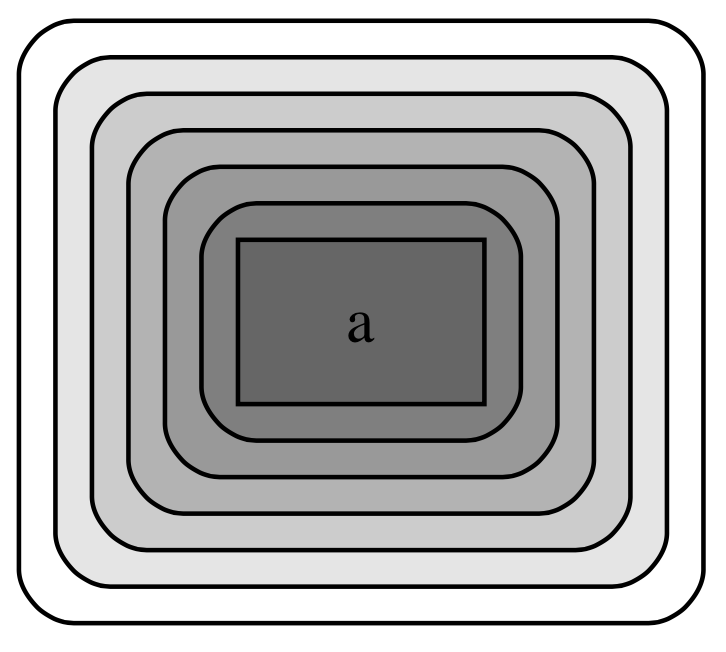

In [274]:
x <- tibble(a = 1:2, b = 3:4)
x
x[["a"]]  # one element
x["a"]   # 'a' element
x[1]   # 1st element
x[1, ]  # 1st row

#*******

a,b
1,3
2,4


[1] 1 2

a
1
2


a
1
2


a,b
1,3


In [276]:
x1 <- list(c(1, 2), c(3, 4))
x2 <- list(list(1, 2), list(3, 4))
x3 <- list(1, list(2, list(3)))
x1
x2
x3

[[1]]
[1] 1 2

[[2]]
[1] 3 4

[[1]]
[[1]][[1]]
[1] 1

[[1]][[2]]
[1] 2


[[2]]
[[2]][[1]]
[1] 3

[[2]][[2]]
[1] 4

[[1]]
[1] 1

[[2]]
[[2]][[1]]
[1] 2

[[2]][[2]]
[[2]][[2]][[1]]
[1] 3

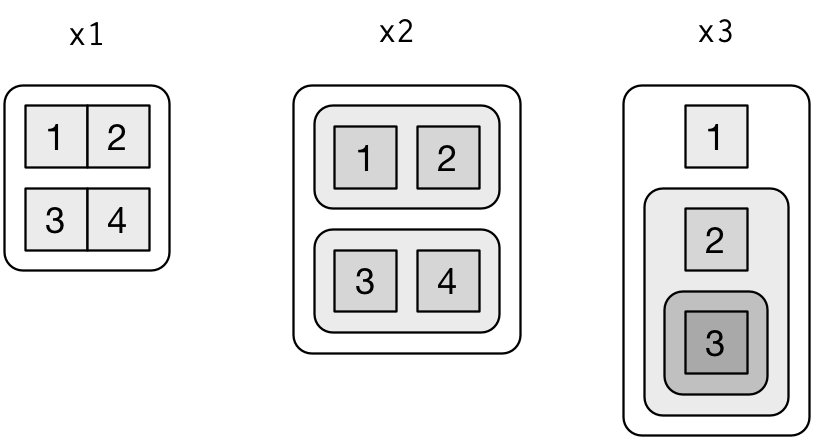

In [278]:
a <- list(a = 1:3, b = "a string", c = pi, d = list(-1, -5))
a
b
c
d

$a
[1] 1 2 3

$b
[1] "a string"

$c
[1] 3.141593

$d
$d[[1]]
[1] -1

$d[[2]]
[1] -5

ERROR: Error in eval(expr, envir, enclos): object 'b' not found


In [280]:
str(a[1:2])
str(a[4])

List of 2
 $ a: int [1:3] 1 2 3
 $ b: chr "a string"
List of 1
 $ d:List of 2
  ..$ : num -1
  ..$ : num -5


In [279]:
str(a[[1]])
str(a[[4]])

 int [1:3] 1 2 3
List of 2
 $ : num -1
 $ : num -5


In [268]:
a$a
a[["a"]]

[1] 1 2 3

[1] 1 2 3

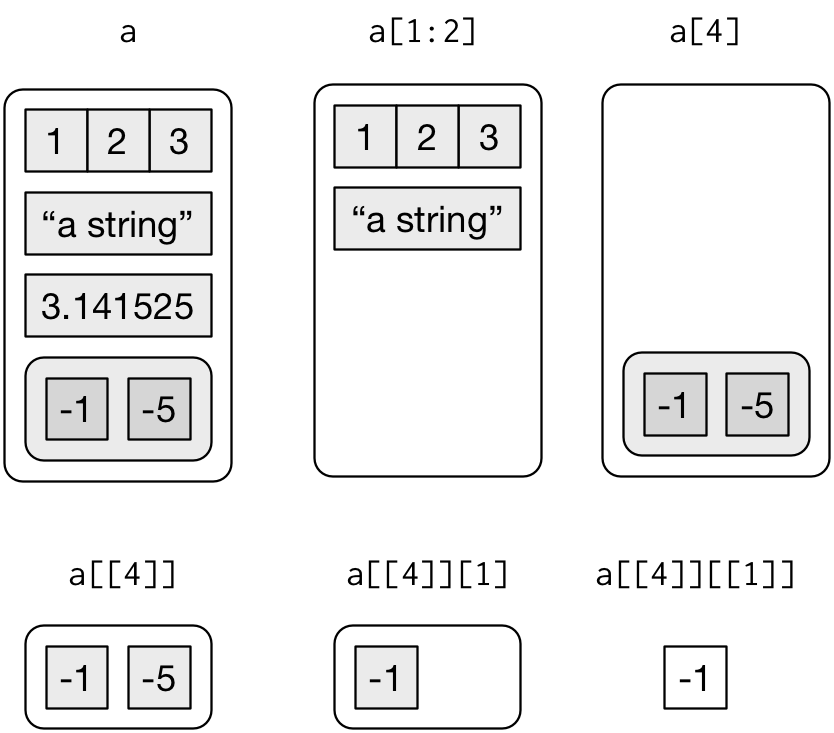

In [281]:
#this shit important*******

a[4]; a[[4]]; a[[4]][1]; a[[4]][[1]]

$d
$d[[1]]
[1] -1

$d[[2]]
[1] -5

[[1]]
[1] -1

[[2]]
[1] -5

[[1]]
[1] -1

[1] -1

In [269]:
x <- tibble(a = 1:2, b = 3:4)
x[["a"]]
x["a"]
x[1]

x[1, ]

[1] 1 2

a
1
2


a
1
2


a,b
1,3


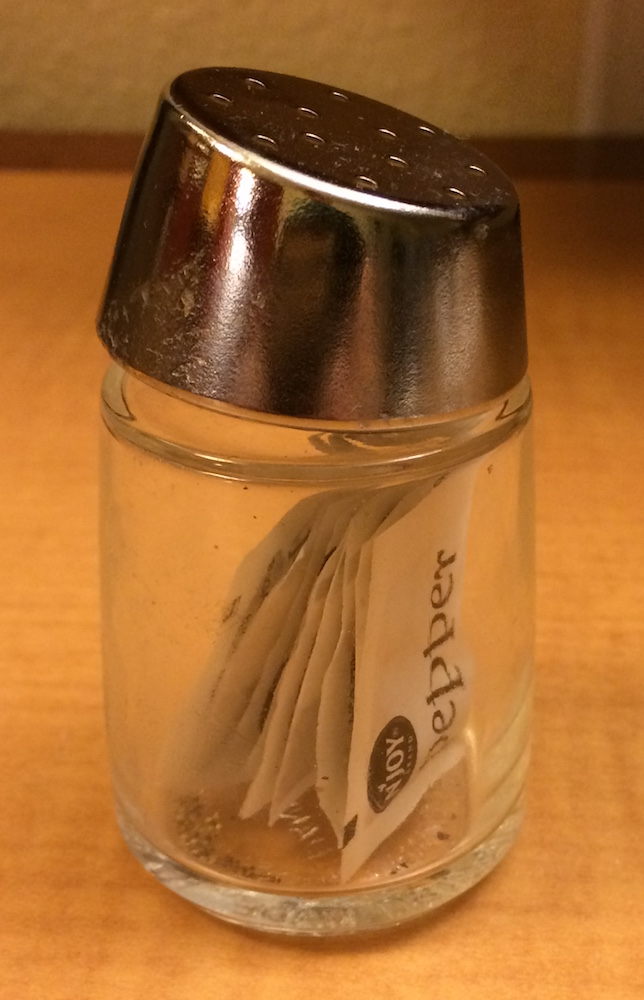

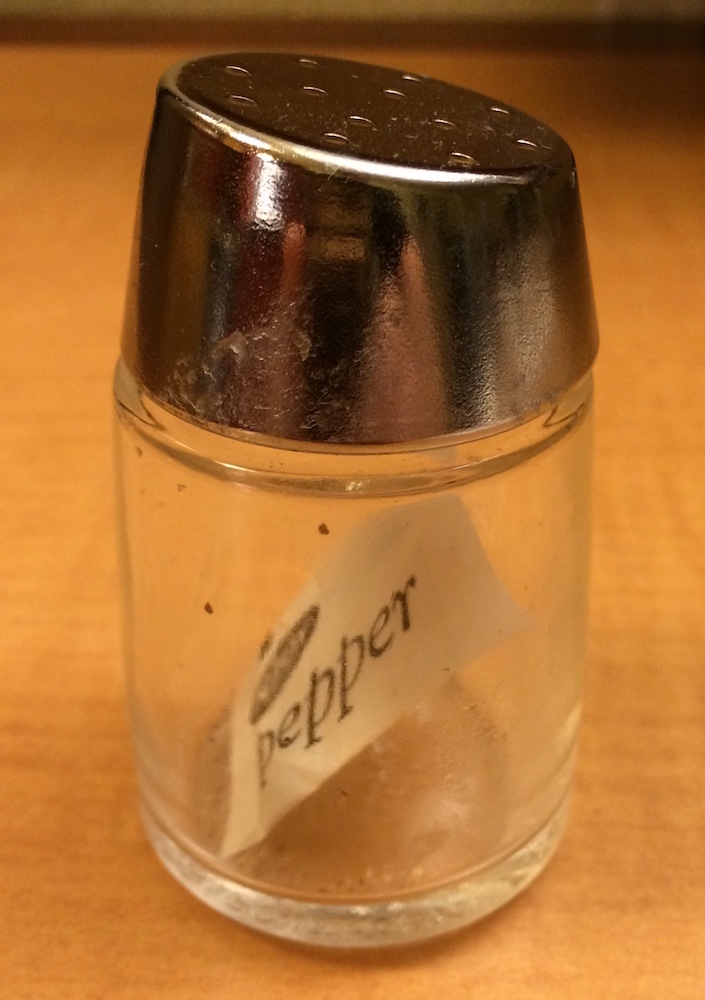

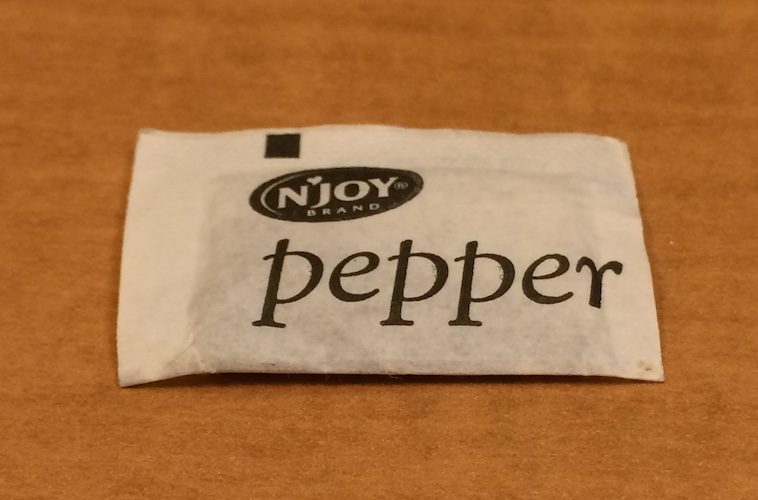

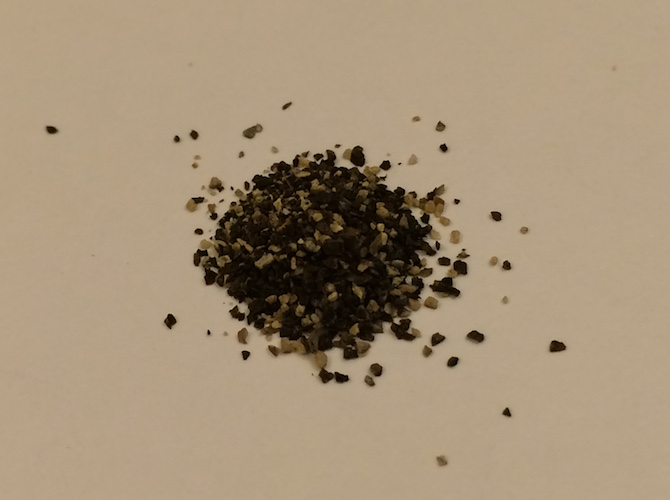

In [285]:
x <- 1:10
attributes(x)
attr(x, "greeting")
attributes(x)
attr(x, "greeting") <- "Hi!"
attributes(x)
attr(x, "farewell") <- "Bye!"
attributes(x)

NULL

NULL

NULL

$greeting
[1] "Hi!"

$greeting
[1] "Hi!"

$farewell
[1] "Bye!"

In [286]:
as.Date

function (x, ...) 
UseMethod("as.Date")
<bytecode: 0x7fd4d22df098>
<environment: namespace:base>

In [288]:

methods("as.Date")

[1] as.Date.character as.Date.default   as.Date.factor    as.Date.numeric  
[5] as.Date.POSIXct   as.Date.POSIXlt  
see '?methods' for accessing help and source code

In [289]:
#*******
getS3method("as.Date", "default")
getS3method("as.Date", "numeric")

function (x, ...) 
{
    if (inherits(x, "Date")) 
        x
    else if (is.logical(x) && all(is.na(x))) 
        .Date(as.numeric(x))
    else stop(gettextf("do not know how to convert '%s' to class %s", 
        deparse(substitute(x)), dQuote("Date")), domain = NA)
}
<bytecode: 0x7fd4d472bbd0>
<environment: namespace:base>

function (x, origin, ...) 
{
    if (missing(origin)) 
        stop("'origin' must be supplied")
    as.Date(origin, ...) + x
}
<bytecode: 0x7fd4b1071118>
<environment: namespace:base>

In [290]:
x <- factor(c("ab", "cd", "ab"), levels = c("ab", "cd", "ef"))
typeof(x)
attributes(x)  #******

[1] "integer"

$levels
[1] "ab" "cd" "ef"

$class
[1] "factor"

In [292]:
x <- as.Date("1971-01-01")
typeof(x)


unclass(x)

typeof(x)
attributes(x)

[1] "double"

[1] 365

[1] "double"

$class
[1] "Date"

In [293]:
x <- lubridate::ymd_hm("1970-01-01 01:00")
unclass(x)

typeof(x)
attributes(x)

[1] 3600
attr(,"tzone")
[1] "UTC"

[1] "double"

$class
[1] "POSIXct" "POSIXt" 

$tzone
[1] "UTC"

In [294]:
y <- as.POSIXlt(x)
typeof(y)
attributes(y)

[1] "list"

$names
[1] "sec"   "min"   "hour"  "mday"  "mon"   "year"  "wday"  "yday"  "isdst"

$class
[1] "POSIXlt" "POSIXt" 

$tzone
[1] "UTC"

In [295]:
tb <- tibble::tibble(x = 1:5, y = 5:1)
typeof(tb)
attributes(tb)
#*******

[1] "list"

$names
[1] "x" "y"

$row.names
[1] 1 2 3 4 5

$class
[1] "tbl_df"     "tbl"        "data.frame"

In [296]:
df <- data.frame(x = 1:5, y = 5:1)
typeof(df)
attributes(df)

[1] "list"

$names
[1] "x" "y"

$class
[1] "data.frame"

$row.names
[1] 1 2 3 4 5

In [300]:
x <- hms::hms(3600)
class(x)

[1] "hms"      "difftime"

In [301]:
typeof(x)

[1] "double"

In [302]:
attributes(x)

$class
[1] "hms"      "difftime"

$units
[1] "secs"

In [297]:
tibble(x = 1, y = 1:5)

x,y
1,1
1,2
1,3
1,4
1,5


In [298]:
tibble(x = 1:3, y = 1:4)

ERROR: Tibble columns must have consistent lengths, only values of length one are recycled:
* Length 3: Column `x`
* Length 4: Column `y`

In [299]:
tibble(x = 1:3, y = list("a", 1, list(1:3)))

x,y
1,a
2,1
3,"1, 2, 3"
